<a href="https://colab.research.google.com/github/archie46/Detection-of-Fraud-Transactions-Using-Recurrent-Neural-Network/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/AML6/

/content/drive/MyDrive/AML6


# **Importing The Required Libraries**



In [ ]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,SimpleRNN,Flatten

# **Reading A Sample From The Dataset**

In [ ]:
data = pd.read_csv('paysim.csv',nrows = 5000)

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **Distribution Of Different Types Of Transactions**

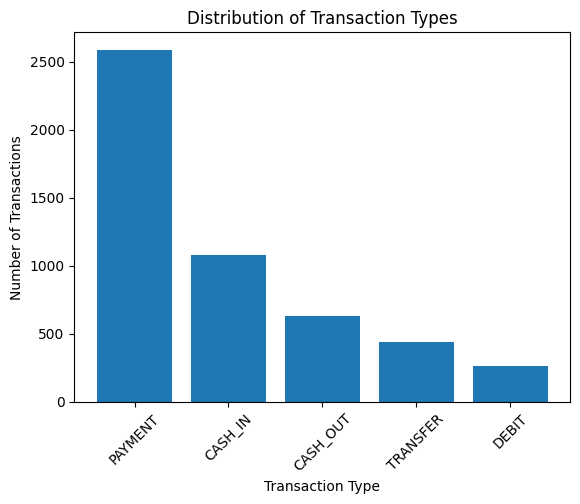

In [ ]:

# Count the number of transactions for each type
transaction_counts = data['type'].value_counts()

# Create a bar plot
plt.bar(transaction_counts.index, transaction_counts.values)

# Add labels and title
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Types')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


# **Distribution Of Fraud and Non-Fraud  Transactions**

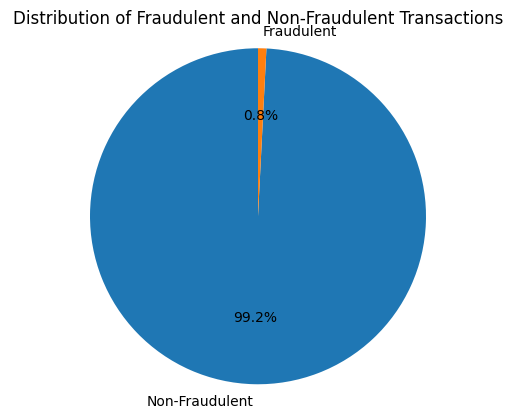

In [ ]:
# Count the number of fraudulent and non-fraudulent transactions
fraud_counts = data[data['isFraud'] == 1]['isFraud'].count()
non_fraud_counts = data[data['isFraud'] == 0]['isFraud'].count()

# Create a pie chart
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = [non_fraud_counts, fraud_counts]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
ax1.set_title('Distribution of Fraudulent and Non-Fraudulent Transactions')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Show the plot
plt.show()


# **Encoding The String Parameters**

In [ ]:
cat_cols = ['type', 'nameOrig', 'nameDest']
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# **Scaling The Numeric Data**

In [ ]:
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# **Dividing Dataset Into Features and Classes**

In [ ]:
X = data.drop('isFraud', axis=1).values
y = data['isFraud'].values

# **Dividing Dataset Into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# **Model**

In [ ]:
model = Sequential([
    SimpleRNN(units=128, input_shape=(X_train.shape[1], 1),return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64, input_shape=(X_train.shape[1], 1),return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=32, input_shape=(X_train.shape[1], 1),return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=16, input_shape=(X_train.shape[1], 1),return_sequences=True),
    Dropout(0.2),
    Flatten(),
    Dense(8, activation=None),
    Dense(4, activation=None),
    Dense(2, activation=None),
    Dense(1, activation='sigmoid')
])

# **Compiling The Model**

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Summary Of The Model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 128)           16640     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10, 64)            12352     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 10, 32)            3104      
                                                                 
 dropout_2 (Dropout)         (None, 10, 32)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 10, 16)            7

# **Training The Model**

In [ ]:
# Train the model
epoch = 2-
history = model.fit(X_train, y_train, epochs=epoch, batch_size=64, validation_split=0.1)

Epoch 1/2
57/57 [==============================] - 11s 47ms/step - loss: 0.0681 - accuracy: 0.9825 - val_loss: 0.0487 - val_accuracy: 0.9925
Epoch 2/2
57/57 [==============================] - 2s 39ms/step - loss: 0.0420 - accuracy: 0.9931 - val_loss: 0.0483 - val_accuracy: 0.9925


# **Plotting Training and Validation Accuracy and Loss**

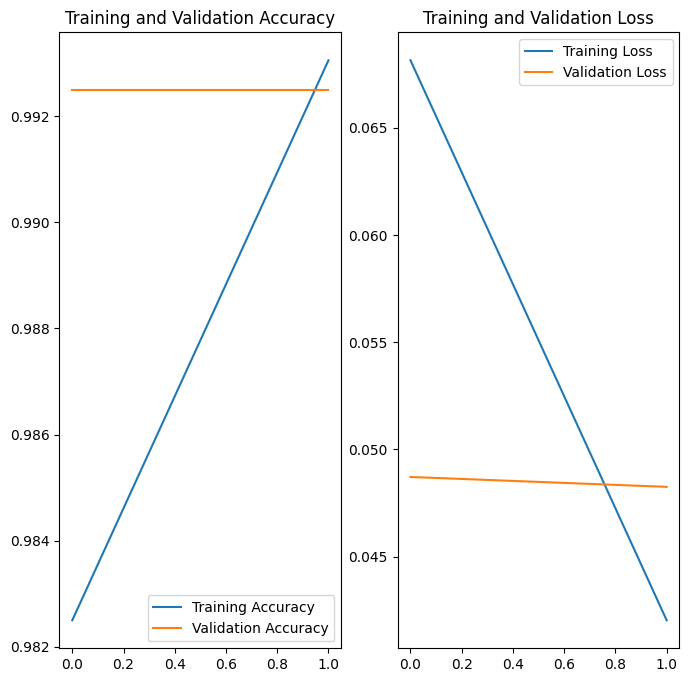

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Testing The Model**

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)

print('\nTest accuracy:', test_acc)

32/32 [==============================] - 0s 6ms/step - loss: 0.0742 - accuracy: 0.9880

Test accuracy: 0.9879999756813049


# **Confusion Matrix and HeatMap**

32/32 [==============================] - 1s 5ms/step
Confusion Matrix:
[[988   0]
 [ 12   0]]


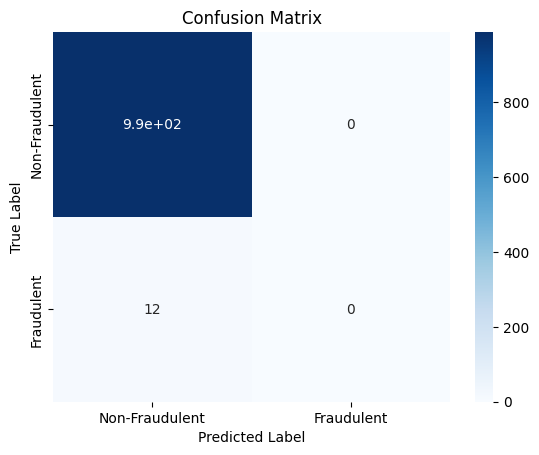

In [ ]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print('Confusion Matrix:')
print(cm)
# Define the labels for the axes
class_names = ['Non-Fraudulent', 'Fraudulent']

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# **Plotting The ROC Curve**

ROC AUC: 0.5


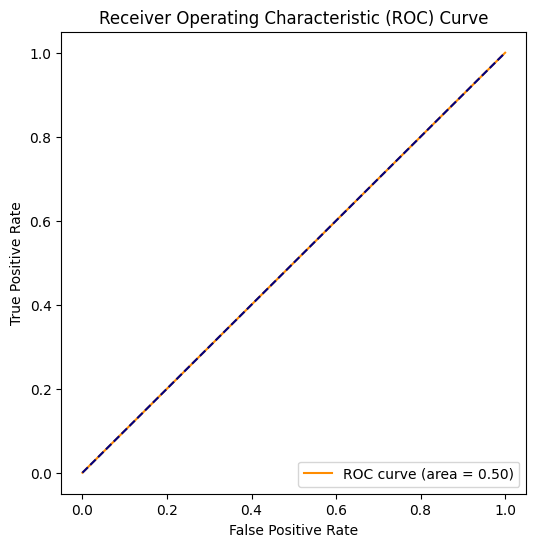

In [ ]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('ROC AUC:', roc_auc)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
